# COVID-19     Novel Coronavirus
## 01.03.2020 tarihli veriler ile Koronavirüs Analizi

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import geopandas
import numpy as np
from shapely.geometry import Point
import math
import plotly.express as px
import plotly.graph_objs as go


In [2]:
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [3]:
init_notebook_mode(connected=True) #olusturulan plotly grafiklerinin gorunur hale gelmesi icin

## PLOTLY 
- plotly kütüphanesinde çizdirdiğimiz her grafik bir obje olarak ele alınıyor. 
- Plotly'de veriyi çizdirebilmek için trace denen bir format oluşturuyoruz. Bunu yaparken de grafik obje kütüphanesini kullanıyoruz.
- scatter plot (saçılım grafiği)
- Sadece scatter içeren bir grafik çizdirmek için bu parametreyi markers olarak ayarlamamız lazım.
- trace kısmını list şeklinde girdi sağlamamız gerekiyor aksi halde hata alırız.
- line graph (çizgi grafik)
- çizgi grafik görmek için bu kısmı lines yapmamız gerekiyor: mode = "lines"
- markerlı çizgi grafiği için: mode = "markers+lines"
- matplotlib ile grafik hazırlayıp plotly ile kullanmak: iplot_mpl fonksiyonunu import ederek matplotlib figürlerini çizdirebiliyoruz. Tabi bunu "offline" kullanmak için plotly.offline modülünden çağırmamız gerekiyor. from plotly.offline import iplot_mpl   iplot_mpl(fig)

- Corona_2019.csv veri setini pandas read_csv ile dahil ettim.

In [55]:
crn = pd.read_csv("Desktop\\sau_edu_projects\\project-1\\corona_2019.csv")

- Veri setini corona adı ile kopyalayarak, orjinalliğini koruyoruz.

In [56]:
corona=crn.copy()
corona.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


- Değişkenlerimiz ve veri tipleri ile ilgili bilgi ediniyoruz. Burada tarih değişkenlerinin datetime olmadığını ve Province değişkeninde null değerler olduğunu görüyoruz.

In [57]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2943 entries, 0 to 2942
Data columns (total 8 columns):
SNo                2943 non-null int64
ObservationDate    2943 non-null object
Province/State     2028 non-null object
Country/Region     2943 non-null object
Last Update        2943 non-null object
Confirmed          2943 non-null float64
Deaths             2943 non-null float64
Recovered          2943 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 184.1+ KB


- ObservationDate değişkeninin veri tipini datetime olarak değiştirdim.
- Veri setine 'week' adlı gözlem tarihine göre hafta bilgisi ve 'day' adlı gözlem tarihine göre gün bilgisi içeren değişkenler ekledim.

In [58]:
corona['ObservationDate'] = pd.to_datetime(corona['ObservationDate'])
corona["week"]=corona["ObservationDate"].dt.week
corona["day"]=corona["ObservationDate"].dt.dayofyear

In [59]:
corona.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,week,day
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,4,22
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,4,22
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,4,22
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,4,22
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,4,22


- Hafta bazlı toplam(kümülatif) onaylanmış vaka, toplam kurtulma ve toplam ölüm sayısının çizgi grafiği:

In [60]:
line_data = corona.groupby('week').sum().reset_index()

line_data = line_data.melt(id_vars='week', 
                 value_vars=['Confirmed', 
                             'Recovered', 
                             'Deaths'], 
                 var_name='Ratio', 
                 value_name='Value')
fig = px.line(line_data, x="week", y="Value", color='Ratio', 
              title='Confirmed cases, Recovered cases, and Death : week')
fig.show()

- Groupby ile gözlem tarihine göre gruplanan verinin diğer değişkenlerinin bu gruplama sonucunda toplam olarak ele alınması.
- Sonra verileri melt ile tarihe göre onaylanan, kurtarılan, ölen toplam vaka sayılarının ayrı alt alta satırlara dönüştürdüm.
- pandas.melt: geniş verileri uzun verilere dönüştürmek için kullanırız.


In [61]:
line_data = corona.groupby('ObservationDate').sum().reset_index()

line_data = line_data.melt(id_vars='ObservationDate', 
                 value_vars=['Confirmed', 
                             'Recovered', 
                             'Deaths'], 
                 var_name='Ratio', 
                 value_name='Value')
line_data.sort_values('ObservationDate', ascending=False)

,ObservationDate,Ratio,Value
119,2020-03-01,Deaths,2996.0
79,2020-03-01,Recovered,42716.0
39,2020-03-01,Confirmed,88371.0
118,2020-02-29,Deaths,2941.0
78,2020-02-29,Recovered,39782.0
...,...,...,...
41,2020-01-23,Recovered,30.0
81,2020-01-23,Deaths,18.0
40,2020-01-22,Recovered,28.0
80,2020-01-22,Deaths,17.0


- Daha sonra figure oluşturup, line_data verisini plotly express kullanarak line(çizgi) grafiğine dönüştürdüm.
- x eksenimi gözlem tarihi ve y eksenimi değer değişkeni olarak belirliyorum.
- color ile grafikte gösterilecek değerleri belirtiyorum.

In [62]:
fig = go.Figure()
fig = px.line(line_data, x="ObservationDate", y="Value", color='Ratio', 
              title='Confirmed cases, Recovered cases, and Death Over Time')
fig.show()

- Verileri ülke ve gözlem tarihine göre gruplayarak belirlenen değişkenler (con-rec-death) için indexlerin toplanarak yazılması ve gözlem tarihine göre sıralanmış halini tutan bar_data oluşturdum.


In [63]:
bar_data = (corona.groupby(['Country/Region', 'ObservationDate'])['Confirmed', 'Deaths', 'Recovered']
            .sum().reset_index().sort_values('ObservationDate', ascending=True))

- Plotly express bar grafiği kullanarak toplam onaylanmış vakaları, gözlem tarihine göre ülke bazında görselleştirdim.
- Veriler üst üste yığınlanabilir. orientation='v', tüm verileri gösterir

In [64]:
fig = px.bar(bar_data, x="ObservationDate", y="Confirmed", color='Country/Region', 
             text = 'Confirmed', orientation='v', height=600, title='Cases')
fig.show()

- Plotly express bar grafiği kullanarak toplam ölüm sayısını, gözlem tarihine göre ülke bazında görselleştirdim.

In [65]:
fig = px.bar(bar_data, x="ObservationDate", y="Deaths", color='Country/Region', 
             text = 'Deaths', orientation='v', height=600, title='Deaths')
fig.show()

- Plotly express bar grafiği kullanarak toplam kurtarılan vakaları, gözlem tarihine göre ülke bazında görselleştirdim.

In [66]:
fig = px.bar(bar_data, x="ObservationDate", y="Recovered", color='Country/Region', 
             text = 'Recovered', orientation='v', height=600, title='Recovered')
fig.show()

- df_countriess adında, corona verilerini ülke ve gözlem tarihine göre gruplanarak diğer değişkenler için indexlerin toplanarak yazılması ve gözlem tarihine göre sıralanmış halini tutan bir dataframe oluşturdum.

In [67]:
df_countriess = corona.groupby(['Country/Region', 'ObservationDate']).sum().reset_index().sort_values('ObservationDate', ascending=False)
df_countriess

,Country/Region,ObservationDate,SNo,Confirmed,Deaths,Recovered,week,day
1221,Vietnam,2020-03-01,2870,16.0,0.0,16.0,9,61
692,New Zealand,2020-03-01,2926,1.0,0.0,0.0,9,61
524,Luxembourg,2020-03-01,2922,1.0,0.0,0.0,9,61
564,Macau,2020-03-01,2876,10.0,0.0,8.0,9,61
604,Mainland China,2020-03-01,88087,79826.0,2870.0,42118.0,279,1891
...,...,...,...,...,...,...,...,...
999,Taiwan,2020-01-22,29,1.0,0.0,0.0,4,22
565,Mainland China,2020-01-22,535,547.0,17.0,28.0,124,682
525,Macau,2020-01-22,21,1.0,0.0,0.0,4,22
857,South Korea,2020-01-22,38,1.0,0.0,0.0,4,22


- Sonra, ülke değişkeni için tekrar eden verileri sildim. (çünkü veriler kümülatif olduğu için ülke bazında en son veri genel toplamı veriyor.)
- Onaylanmış vaka sayısı sıfır büyük olanları ele aldım.

In [68]:
df_countriess = df_countriess.drop_duplicates(subset = ['Country/Region'])
df_countriess = df_countriess[df_countriess['Confirmed']>0]
df_countriess

,Country/Region,ObservationDate,SNo,Confirmed,Deaths,Recovered,week,day
1221,Vietnam,2020-03-01,2870,16.0,0.0,16.0,9,61
692,New Zealand,2020-03-01,2926,1.0,0.0,0.0,9,61
524,Luxembourg,2020-03-01,2922,1.0,0.0,0.0,9,61
564,Macau,2020-03-01,2876,10.0,0.0,8.0,9,61
604,Mainland China,2020-03-01,88087,79826.0,2870.0,42118.0,279,1891
...,...,...,...,...,...,...,...,...
782,Romania,2020-03-01,2899,3.0,0.0,0.0,9,61
992,Sweden,2020-03-01,2873,14.0,0.0,0.0,9,61
696,North Ireland,2020-02-28,2685,1.0,0.0,0.0,9,59
0,Azerbaijan,2020-02-28,2664,1.0,0.0,0.0,9,59


- Plotly kütüphanesinde çizdirdiğimiz her grafik bir obje olarak ele alınıyor. Bu yüzden graph_objs kütüphanesi import ettim.
- Burada önce figure oluşturup verimi koroplet harita ile görselleştirmek istediğimi belirtiyorum.
- locations: df_countriess verisinde ülke değişkenini lokasyon olarak belirtiyorum.
- z: Ülke bazında gösterilecek değerimi onaylanmış vaka sayısı olarak
- colorscale: renk skalası kırmızı
- marker_line_color: çizgi renkleri siyah
- marker_line_width: çizgi kalınlığını ise 0.5 olarak belirtiyorum.
- update_layout ile oluşturduğumuz figürün görünümünü düzenleyebiliyoruz.
- title_text: başlık
- title_x : başlığın konumunu (0-1)
- geo ile çerçeve görünümü, şekli belirlenir.

In [69]:
import plotly.graph_objs as go

fig = go.Figure(data=go.Choropleth(
    locations = df_countriess['Country/Region'],
    locationmode = 'country names',
    z = df_countriess['Confirmed'],
    colorscale = 'Reds',
    marker_line_color = 'black',
    marker_line_width = 0.5,
))

fig.update_layout(
    title_text = 'Confirmed Cases',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
        projection_type = 'equirectangular'
    )
)

- ülkeye göre onaylanmış vaka sayılarını kullanarak; px.pie ile pasta grafiğini içeren bir figür oluşturdum.
- Figürü update_traces ile güncelliyorum.
- textposition: metin pozisyonunu pasta dilimi içine olarak
- textinfo: metin bilgisini de yüzde + ülke ismi olarak belirliyorum.
- update_layout ile figürün görünümünü düzenliyorum.

In [70]:
fig = px.pie(df_countriess, values = 'Confirmed',names='Country/Region', height=600)
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_layout(
    title_text='Confirmed Cases',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))

fig.show()

- Koroplet harita ile ülke değişkenine göre toplam ölüm sayılarının harita üzerinde gösterilmesi:
- locations: df_countriess verisinde ülke değişkenini lokasyon olarak belirtiyorum.
- z: Ülke bazında gösterilecek değerimi ölüm sayısı olarak
- colorscale: renk skalası kırmızı
- marker_line_color: çizgi renkleri siyah
- marker_line_width: çizgi kalınlığını ise 0.5 olarak belirtiyorum.
- update_layout ile figürün görünümünü düzenledim

In [71]:
fig = go.Figure(data=go.Choropleth(
    locations = df_countriess['Country/Region'],
    locationmode = 'country names',
    z = df_countriess['Deaths'],
    colorscale = 'Reds',
    marker_line_color = 'black',
    marker_line_width = 0.5,
))

fig.update_layout(
    title_text = 'Deaths Cases',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
        projection_type = 'equirectangular'
    )
)

- ülkeye göre toplam ölüm sayılarını kullanarak; px.pie ile pasta grafiğini içeren bir figür oluşturdum.
- Figürü update_traces ile güncelliyorum.
- update_layout ile oluşturduğumuz figürün görünümünü düzenliyorum.

In [72]:
fig = px.pie(df_countriess, values = 'Deaths',names='Country/Region', height=600)
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_layout(
    title_text='Deaths Cases',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))

fig.show()

- Koroplet harita ile ülke değişkenine göre toplam kurtarılan vaka sayılarının harita üzerinde gösterilmesi:
- locations: df_countriess verisinde ülke değişkenini lokasyon olarak belirtiyorum.
- z: Ülke bazında gösterilecek değerimi kuratrılan vaka sayısı olarak
- colorscale: renk skalası kırmızı
- marker_line_color: çizgi renkleri siyah
- marker_line_width: çizgi kalınlığını ise 0.5 olarak belirtiyorum.
- update_layout ile figürün görünümünü düzenliyorum.

In [73]:
fig = go.Figure(data=go.Choropleth(
    locations = df_countriess['Country/Region'],
    locationmode = 'country names',
    z = df_countriess['Recovered'],
    colorscale = 'Reds',
    marker_line_color = 'black',
    marker_line_width = 0.5,
))

fig.update_layout(
    title_text = 'Recovered Cases',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
        projection_type = 'equirectangular'
    )
)

- df_countries_no_china adında Çin harici ülkeleri içeren bir df oluşturdum.
- px.pie ile df_countries_no_china verisini kullanarak Çin harici ülkeler için onaylanmış vaka sayılarının pasta grafiğini görselleştirdim.

In [74]:
df_countries_no_china = df_countriess[df_countriess['Country/Region'] != 'Mainland China']
fig = px.pie(df_countries_no_china, values = 'Confirmed',names='Country/Region', height=600)
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_layout(
    title_text='Confirmed Cases - except China',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))

fig.show()

- px.treemap ile df_countries_no_china verisini kullanarak Çin harici ülkeler için onaylanmış vaka sayılarının ağaç haritası görselleştirdim.
- Figürü update_traces ile güncelliyorum.
- textposition: metin pozisyonunu
- textinfo: metin bilgisi
- update_layout ile figürün görünümünü düzenliyorum.

In [75]:
fig = px.treemap(df_countries_no_china, path=['Country/Region'], values='Confirmed', height=600, width=1000)
fig.update_traces(textposition='top left', textinfo='label+text+value+percent root')

fig.update_layout(
    title_text='Confirmed Cases - except China',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))

fig.show()

- df_countrydate adında bir df oluşturdum.
- Önce onaylanmış vaka sayısı sıfırdan büyükleri kapsadım. Daha sonra tarih ve ülke değişkenine göre, diğer değişkenler için indexlerini toplayarak grupladım.

In [76]:
coronadf=crn.copy()
df_countrydate = coronadf[coronadf['Confirmed']>0]
df_countrydate = df_countrydate.groupby(['ObservationDate','Country/Region']).sum().reset_index()

In [77]:
df_countrydate.sort_values('Confirmed', ascending=False)

,ObservationDate,Country/Region,SNo,Confirmed,Deaths,Recovered
1184,03/01/2020,Mainland China,88087,79826.0,2870.0,42118.0
1116,02/29/2020,Mainland China,84373,79251.0,2835.0,39279.0
1054,02/28/2020,Mainland China,80819,78824.0,2788.0,36291.0
997,02/27/2020,Mainland China,77548,78498.0,2744.0,32898.0
946,02/26/2020,Mainland China,74403,78065.0,2715.0,30053.0
...,...,...,...,...,...,...
502,02/13/2020,Cambodia,1402,1.0,0.0,1.0
504,02/13/2020,Finland,1404,1.0,0.0,1.0
514,02/13/2020,Nepal,1406,1.0,0.0,1.0
955,02/26/2020,Romania,2466,1.0,0.0,0.0


- Coronavirüsün Zaman İçinde Global Olarak Yayılması:
- Plotly express Koroplet harita ile df_countrydate verisini kullanarak her ülkenin toplam onaylanmış vaka sayılarının gözlem tarihine göre animasyon şeklinde görselleştirilmesi.
- locations: ülke değişkenini lokasyon olarak belirtiyorum.
- color: renk bölümünü onaylanmış vaka değişkeni olarak
- hover_name: fare ile üzerine gelindiğinde ülkeye ait bilgilerin gösterilmesini
- animation_frame: animasyonun gözlem tarihine göre ilerlemesini belirliyorum.
- update_layout ile figürün görünümünü düzenliyorum.

In [78]:
fig = px.choropleth(df_countrydate, 
                    locations="Country/Region", 
                    locationmode = "country names",
                    color="Confirmed", 
                    hover_name="Country/Region", 
                    animation_frame="ObservationDate"
                   )

fig.update_layout(
    title_text = 'Spread of Coronavirus',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))
    
fig.show()

- df_countriess'e 
- Percentage_recovery adında kurtarılan vaka sayılarının toplam onaylanmış vaka sayısına bölümüyle elde edilen kurtulma yüzdesi ve 
- Percentage_deaths adında toplam ölüm sayısının toplam onaylanmış vaka sayısına bölümüyle elde edilen ölüm yüzdesi değişkenlerini ekliyorum.

In [79]:
Perc_rec = (df_countriess['Recovered'] / df_countriess['Confirmed']) * 100
Perc_death = (df_countriess['Deaths'] / df_countriess['Confirmed']) * 100
df_countriess['Percentage_recovery'] = Perc_rec
df_countriess['Percentage_deaths'] = Perc_death

In [80]:
df_countriess

,Country/Region,ObservationDate,SNo,Confirmed,Deaths,Recovered,week,day,Percentage_recovery,Percentage_deaths
1221,Vietnam,2020-03-01,2870,16.0,0.0,16.0,9,61,100.000000,0.00000
692,New Zealand,2020-03-01,2926,1.0,0.0,0.0,9,61,0.000000,0.00000
524,Luxembourg,2020-03-01,2922,1.0,0.0,0.0,9,61,0.000000,0.00000
564,Macau,2020-03-01,2876,10.0,0.0,8.0,9,61,80.000000,0.00000
604,Mainland China,2020-03-01,88087,79826.0,2870.0,42118.0,279,1891,52.762258,3.59532
...,...,...,...,...,...,...,...,...,...,...
782,Romania,2020-03-01,2899,3.0,0.0,0.0,9,61,0.000000,0.00000
992,Sweden,2020-03-01,2873,14.0,0.0,0.0,9,61,0.000000,0.00000
696,North Ireland,2020-02-28,2685,1.0,0.0,0.0,9,59,0.000000,0.00000
0,Azerbaijan,2020-02-28,2664,1.0,0.0,0.0,9,59,0.000000,0.00000


- Ülkeye göre kurtulma yüzdelerinin bar grafiği ile görselleştirilmesi.

In [81]:
fig = px.bar(df_countriess, x="Country/Region", y="Percentage_recovery", color='Percentage_recovery', 
             text = 'Percentage_recovery', orientation='v', height=600, title='Percentage_recovery')
fig.show()

- Ülkeye göre ölüm yüzdelerinin bar grafiği ile görselleştirilmesi.

In [82]:
fig = px.bar(df_countriess, x="Country/Region", y="Percentage_deaths", color='Percentage_deaths', 
             text = 'Percentage_deaths', orientation='v', height=600, title='Percentage_deaths')
fig.show()

- Ülkeye göre kurtulma ve ölüm yüzdelerinin çizgi grafiği ile görselleştirilmesi.

In [83]:
line_data = df_countriess.groupby('Country/Region').sum().reset_index()

line_data = line_data.melt(id_vars='Country/Region', 
                 value_vars=['Percentage_recovery', 
                             'Percentage_deaths'], 
                 var_name='Ratio', 
                 value_name='Value')
fig = px.line(line_data, x="Country/Region", y="Value", color='Ratio', 
              title='Percentage_recovery and Percentage_deaths')
fig.show()

- Italya, Çin, Kore, Iran ülkeleri için sadece o ülke verilerini kapsayan kendi isimlerinde df'ler oluşturdum.

In [84]:
Italy = corona[corona['Country/Region'] == 'Italy']
China = corona[corona['Country/Region'] == 'Mainland China']
SouthKorea = corona[corona['Country/Region'] == 'South Korea']
Iran = corona[corona['Country/Region'] == 'Iran']

- Italy verisinin tarihe göre kurtulan, ölen ve onaylanan vaka değişkenlerinin toplanması ve temp adlı değişkenin melt ile case ve value sütunlarının C/D/R değerlerini içeren veri setinin oluşturulması.

In [85]:
temp = Italy.groupby('ObservationDate')['Recovered', 'Deaths', 'Confirmed'].sum().reset_index()
temp = temp.melt(id_vars="ObservationDate", value_vars=['Recovered', 'Deaths', 'Confirmed'],
                 var_name='Case', value_name='Count')
temp.tail()

,ObservationDate,Case,Count
88,2020-02-26,Confirmed,453.0
89,2020-02-27,Confirmed,655.0
90,2020-02-28,Confirmed,888.0
91,2020-02-29,Confirmed,1128.0
92,2020-03-01,Confirmed,1694.0


- Bu temp veri setinin gölem tarihine göre Count ve Case değişkenlerinin px.area ile yığılmış bir alan grafiği oluşturdum. Color değişkeni C/D/R bilgisini ve Case değişkeni bunların değerlerini belirtmektedir.

In [86]:
fig = px.area(temp, x="ObservationDate", y="Count", color='Case',
             title='Italy Cases over time')
fig.show()

- Plotly'de veriyi çizdirebilmek için trace denen bir format oluşturuyoruz. Bunu yaparken de grafik obje kütüphanesini kullanıyoruz.
- 4 figür çizdirmek için make_subplot ile bu alanları ve başlıklarını belirtiyorum.
- (1,1) figürü için China verisi
- (1,2) figürü için Italy verisi
- (2,1) figürü için SouthKorea verisi
- (2,2) figürü için Iran verisi
- Kullanılarak gözlem tarihine göre onaylanmış toplam vaka sayılarının bar grafiği ile görselleştirilmesi.

In [87]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{}, {}]],
    subplot_titles=("China","Italy","S.Korea","India"))

fig.add_trace(go.Bar(x=China['ObservationDate'], y=China['Confirmed'],
                    marker=dict(color=China['Confirmed'], coloraxis="coloraxis")),
              1, 1)

fig.add_trace(go.Bar(x=Italy['ObservationDate'], y=Italy['Confirmed'],
                    marker=dict(color=Italy['Confirmed'], coloraxis="coloraxis")),
              1, 2)

fig.add_trace(go.Bar(x=SouthKorea['ObservationDate'], y=SouthKorea['Confirmed'],
                    marker=dict(color=SouthKorea['Confirmed'], coloraxis="coloraxis")),
              2, 1)
fig.add_trace(go.Bar(x=Iran['ObservationDate'], y=Iran['Confirmed'],
                    marker=dict(color=Iran['Confirmed'], coloraxis="coloraxis")),
              2, 2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Total Confirmed cases(Cumulative)")

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

- df_countriess'e ActiveCases adında toplam vaka sayısından ölen ve kurtarılan vaka sayısının çıkarılmasıyla elde edilen aktif vaka sasyısı değişkenini ekledim.

In [88]:
ActiveCases=(df_countriess['Confirmed']-(df_countriess['Recovered']+df_countriess['Deaths']))
df_countriess['ActiveCases'] = ActiveCases
df_countriess

,Country/Region,ObservationDate,SNo,Confirmed,Deaths,Recovered,week,day,Percentage_recovery,Percentage_deaths,ActiveCases
1221,Vietnam,2020-03-01,2870,16.0,0.0,16.0,9,61,100.000000,0.00000,0.0
692,New Zealand,2020-03-01,2926,1.0,0.0,0.0,9,61,0.000000,0.00000,1.0
524,Luxembourg,2020-03-01,2922,1.0,0.0,0.0,9,61,0.000000,0.00000,1.0
564,Macau,2020-03-01,2876,10.0,0.0,8.0,9,61,80.000000,0.00000,2.0
604,Mainland China,2020-03-01,88087,79826.0,2870.0,42118.0,279,1891,52.762258,3.59532,34838.0
...,...,...,...,...,...,...,...,...,...,...,...
782,Romania,2020-03-01,2899,3.0,0.0,0.0,9,61,0.000000,0.00000,3.0
992,Sweden,2020-03-01,2873,14.0,0.0,0.0,9,61,0.000000,0.00000,14.0
696,North Ireland,2020-02-28,2685,1.0,0.0,0.0,9,59,0.000000,0.00000,1.0
0,Azerbaijan,2020-02-28,2664,1.0,0.0,0.0,9,59,0.000000,0.00000,1.0


- px.bar ile toplam aktif vaka sayılarının bar grafiğini oluşturdum.

In [89]:
fig = px.bar(df_countriess.sort_values('ActiveCases', ascending=False).sort_values('ActiveCases', ascending=True).tail(25), 
             x="ActiveCases", y="Country/Region", title='Toplam Aktif Vaka Sayısı - 01.03.2020', text='ActiveCases', orientation='h', 
             width=700, height=700, range_x = [0, max(df_countriess['ActiveCases'])])
fig.update_traces(marker_color='#46cdcf', opacity=0.8, textposition='outside')

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

- corona_confirmed.csv adlı dosyayı ekledim.
- Bu dosya içerinde ülkelerin 

In [91]:
crn_c = pd.read_csv("Desktop\\sau_edu_projects\\project-1\\corona_confirmed.csv")
crn_c.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
0,Anhui,Mainland China,31.82571,117.2264,1,9,15,39,60,70,...,860,889,910,934,950,962,973,982,986,987
1,Beijing,Mainland China,40.18238,116.4142,14,22,36,41,68,80,...,342,352,366,372,375,380,381,387,393,395
2,Chongqing,Mainland China,30.05718,107.8740,6,9,27,57,75,110,...,505,518,529,537,544,551,553,555,560,567
3,Fujian,Mainland China,26.07783,117.9895,1,5,10,18,35,59,...,267,272,279,281,285,287,290,292,293,293
4,Gansu,Mainland China,36.06110,103.8343,0,2,2,4,7,14,...,86,87,90,90,90,90,91,91,91,91


In [92]:
crn_c['Province/State'].fillna(crn_c['Country/Region'], inplace=True)

In [93]:
corona['Province/State'].fillna(corona['Country/Region'], inplace=True)

In [94]:
#burada corona.csv verisinde ülke ve eyalet değişkenlerini baz alarak tarihe göre tüm degiskenlerin kendi içinde toplanması, tarihe göre sıralanması
df_ProvinceCountry= corona.groupby(['Province/State','Country/Region', 'ObservationDate']).sum().reset_index().sort_values('ObservationDate', ascending=False)
df_ProvinceCountry

,Province/State,Country/Region,ObservationDate,SNo,Confirmed,Deaths,Recovered,week,day
2942,Zhejiang,Mainland China,2020-03-01,2824,1205.0,1.0,1046.0,9,61
154,Belgium,Belgium,2020-03-01,2903,2.0,0.0,1.0,9,61
1685,Norway,Norway,2020-03-01,2868,19.0,0.0,0.0,9,61
1680,North Macedonia,North Macedonia,2020-03-01,2928,1.0,0.0,0.0,9,61
1671,Ningxia,Mainland China,2020-03-01,2857,73.0,0.0,69.0,9,61
...,...,...,...,...,...,...,...,...,...
1152,Japan,Japan,2020-01-22,36,2.0,0.0,0.0,4,22
882,Hong Kong,Hong Kong,2020-01-22,13,0.0,0.0,0.0,4,22
2903,Zhejiang,Mainland China,2020-01-22,35,10.0,0.0,0.0,4,22
2112,Shanghai,Mainland China,2020-01-22,26,9.0,0.0,0.0,4,22


In [95]:
df_ProvinceCountry = df_ProvinceCountry.drop_duplicates(subset = ['Province/State'])
df_ProvinceCountry

,Province/State,Country/Region,ObservationDate,SNo,Confirmed,Deaths,Recovered,week,day
2942,Zhejiang,Mainland China,2020-03-01,2824,1205.0,1.0,1046.0,9,61
154,Belgium,Belgium,2020-03-01,2903,2.0,0.0,1.0,9,61
1685,Norway,Norway,2020-03-01,2868,19.0,0.0,0.0,9,61
1680,North Macedonia,North Macedonia,2020-03-01,2928,1.0,0.0,0.0,9,61
1671,Ningxia,Mainland China,2020-03-01,2857,73.0,0.0,69.0,9,61
...,...,...,...,...,...,...,...,...,...
62,Arizona,US,2020-01-31,485,1.0,0.0,0.0,5,31
1151,Ivory Coast,Ivory Coast,2020-01-27,265,1.0,0.0,0.0,5,27
67,Australia,Australia,2020-01-26,213,4.0,0.0,0.0,4,26
266,Chicago,US,2020-01-24,119,1.0,0.0,0.0,4,24


In [96]:
result = pd.merge(df_ProvinceCountry, crn_c, on=['Province/State','Country/Region'], how='inner')
result = result[['ObservationDate','Province/State','Country/Region','Lat','Long','Confirmed','Deaths','Recovered','week','day']]
result

,ObservationDate,Province/State,Country/Region,Lat,Long,Confirmed,Deaths,Recovered,week,day
0,2020-03-01,Zhejiang,Mainland China,29.18251,120.09850,1205.0,1.0,1046.0,9,61
1,2020-03-01,Belgium,Belgium,50.50390,4.46990,2.0,0.0,1.0,9,61
2,2020-03-01,Ningxia,Mainland China,37.26923,106.16550,73.0,0.0,69.0,9,61
3,2020-03-01,New South Wales,Australia,-33.86880,151.20930,6.0,0.0,4.0,9,61
4,2020-03-01,Nepal,Nepal,28.39490,84.12400,1.0,0.0,1.0,9,61
...,...,...,...,...,...,...,...,...,...,...
71,2020-03-01,Anhui,Mainland China,31.82571,117.22640,990.0,6.0,873.0,9,61
72,2020-03-01,Xinjiang,Mainland China,41.11981,85.17822,76.0,3.0,64.0,9,61
73,2020-03-01,Sichuan,Mainland China,30.61714,102.71030,538.0,3.0,365.0,9,61
74,2020-03-01,"Tempe, AZ",US,34.04890,-111.09400,1.0,0.0,1.0,9,61


In [97]:
import folium  
m = folium.Map(location=[0, 0], tiles='cartodbpositron',
               min_zoom=2, max_zoom=8, zoom_start=2)

for i in range(0, len(result)):
    folium.Circle(
        location=[result.iloc[i]['Lat'], result.iloc[i]['Long']],
        color='crimson', 
        tooltip =   '<li><bold>Country : '+str(result.iloc[i]['Country/Region'])+
                    '<li><bold>Province : '+str(result.iloc[i]['Province/State'])+
                    '<li><bold>Confirmed : '+str(result.iloc[i]['Confirmed'])+
                    '<li><bold>Deaths : '+str(result.iloc[i]['Deaths'])+
                    '<li><bold>Recovered : '+str(result.iloc[i]['Recovered']),
        radius=int(result.iloc[i]['Confirmed'])).add_to(m)
m

In [98]:
def plot_rate(country):
    country_data = df_countrydate[df_countrydate['Country/Region']==country]
    table = country_data.drop(['SNo'], axis=1)
    table['ActiveCases'] = table['Confirmed'] - (table['Recovered'] + table['Deaths'])
    
    #growth rate
    table["growthrate"]=table["ActiveCases"]/table["ActiveCases"].shift(+1)
    #death rate
    table=table[table.Confirmed>0]
    table["deathrate"]=table["Deaths"]/table["Confirmed"]
    
    line_data = table.melt(id_vars='ObservationDate',
                               value_vars=['growthrate','deathrate'],
                               var_name='Ratio',
                               value_name='Value')
    
    #fig = go.Figure()
    fig = px.line(line_data, x="ObservationDate", y="Value", color='Ratio',
                  title='Growth/Death Rate')
    return fig.show() 

In [99]:
plot_rate('Mainland China')

In [100]:
plot_rate('Italy')

In [101]:
plot_rate('US')

In [102]:
table = df_countrydate.drop(['SNo'], axis=1)
#death rate
table=table[table.Confirmed>0]
table["deathrate"]=round((table["Deaths"]/table["Confirmed"])*100, 2)

table = table[table['Confirmed']>100]
table = table.sort_values('deathrate', ascending=False)

fig = px.bar(table.sort_values('deathrate', ascending=False).sort_values('deathrate', ascending=True), 
             x="deathrate", y="Country/Region", text='deathrate', orientation='h', 
             width=700, height=600, range_x = [0, 10])
fig.update_traces(marker_color='#00a8cc', opacity=0.6, textposition='outside')
fig.show()

In [103]:
df_countriess

,Country/Region,ObservationDate,SNo,Confirmed,Deaths,Recovered,week,day,Percentage_recovery,Percentage_deaths,ActiveCases
1221,Vietnam,2020-03-01,2870,16.0,0.0,16.0,9,61,100.000000,0.00000,0.0
692,New Zealand,2020-03-01,2926,1.0,0.0,0.0,9,61,0.000000,0.00000,1.0
524,Luxembourg,2020-03-01,2922,1.0,0.0,0.0,9,61,0.000000,0.00000,1.0
564,Macau,2020-03-01,2876,10.0,0.0,8.0,9,61,80.000000,0.00000,2.0
604,Mainland China,2020-03-01,88087,79826.0,2870.0,42118.0,279,1891,52.762258,3.59532,34838.0
...,...,...,...,...,...,...,...,...,...,...,...
782,Romania,2020-03-01,2899,3.0,0.0,0.0,9,61,0.000000,0.00000,3.0
992,Sweden,2020-03-01,2873,14.0,0.0,0.0,9,61,0.000000,0.00000,14.0
696,North Ireland,2020-02-28,2685,1.0,0.0,0.0,9,59,0.000000,0.00000,1.0
0,Azerbaijan,2020-02-28,2664,1.0,0.0,0.0,9,59,0.000000,0.00000,1.0


In [104]:
df_countriess

,Country/Region,ObservationDate,SNo,Confirmed,Deaths,Recovered,week,day,Percentage_recovery,Percentage_deaths,ActiveCases
1221,Vietnam,2020-03-01,2870,16.0,0.0,16.0,9,61,100.000000,0.00000,0.0
692,New Zealand,2020-03-01,2926,1.0,0.0,0.0,9,61,0.000000,0.00000,1.0
524,Luxembourg,2020-03-01,2922,1.0,0.0,0.0,9,61,0.000000,0.00000,1.0
564,Macau,2020-03-01,2876,10.0,0.0,8.0,9,61,80.000000,0.00000,2.0
604,Mainland China,2020-03-01,88087,79826.0,2870.0,42118.0,279,1891,52.762258,3.59532,34838.0
...,...,...,...,...,...,...,...,...,...,...,...
782,Romania,2020-03-01,2899,3.0,0.0,0.0,9,61,0.000000,0.00000,3.0
992,Sweden,2020-03-01,2873,14.0,0.0,0.0,9,61,0.000000,0.00000,14.0
696,North Ireland,2020-02-28,2685,1.0,0.0,0.0,9,59,0.000000,0.00000,1.0
0,Azerbaijan,2020-02-28,2664,1.0,0.0,0.0,9,59,0.000000,0.00000,1.0


In [8]:
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_confirmed = df_confirmed.rename(columns={"Province/State":"state","Country/Region": "country"})
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_deaths = df_deaths.rename(columns={"Province/State":"state","Country/Region": "country"})

In [3]:
df_deaths.head()

,state,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1,2,4,4,4,4,4,4,4,6
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,5,5,6,8,10,10,11,15,15,16
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,19,21,25,26,29,31,35,44,58,86
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,3,3,3,6,8,12,14,15
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,2,2,2,2,2


In [4]:
df_deaths.columns[-1]

'4/2/20'

In [5]:
df_deaths.groupby('country').sum().drop(["Lat","Long"],axis =1).sort_values(df_deaths.columns[-1], ascending= False)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
country,,,,,,,,,,,,,,,,,,,,,
Italy,0,0,0,0,0,0,0,0,0,0,...,6820,7503,8215,9134,10023,10779,11591,12428,13155,13915
Spain,0,0,0,0,0,0,0,0,0,0,...,2808,3647,4365,5138,5982,6803,7716,8464,9387,10348
US,0,0,0,0,0,0,0,0,0,0,...,706,942,1209,1581,2026,2467,2978,3873,4757,5926
France,0,0,0,0,0,0,0,0,0,0,...,1102,1333,1698,1997,2317,2611,3030,3532,4043,5398
China,17,18,26,42,56,82,131,133,171,213,...,3281,3285,3291,3296,3299,3304,3308,3309,3316,3322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dominica,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bhutan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Somalia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


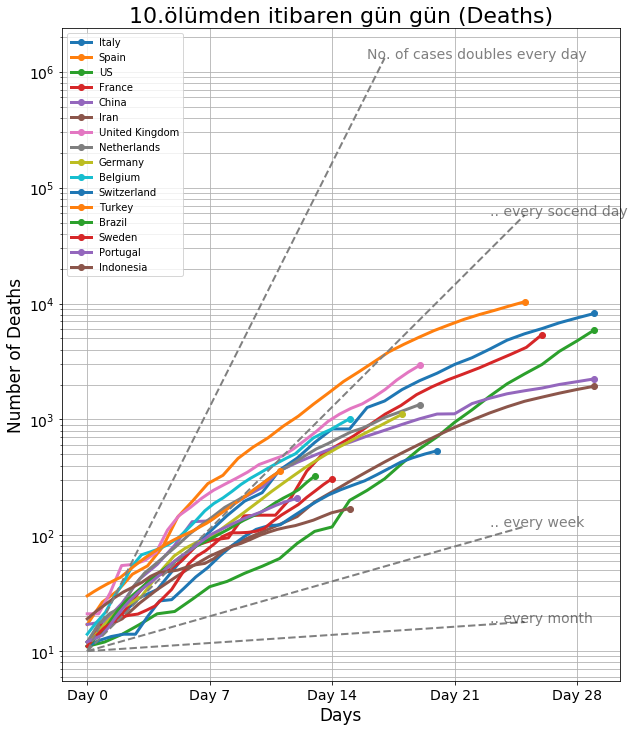

In [14]:
from scipy.interpolate import make_interp_spline, BSpline

temp = df_deaths.groupby('country').sum().drop(["Lat","Long"],axis =1).sort_values(df_deaths.columns[-1], ascending= False)

threshold = 10
f = plt.figure(figsize=(10,12))
ax = f.add_subplot(111)
for i,country in enumerate(temp.index):
    if i > 15:
        break
    x = 30
    t = temp.loc[temp.index== country].values[0]
    t = t[t>threshold][:x]
     
    date = np.arange(0,len(t[:x]))
    xnew = np.linspace(date.min(), date.max(), 30)
    spl = make_interp_spline(date, t, k=1)  # type: BSpline
    power_smooth = spl(xnew)
    plt.plot(xnew,power_smooth,'-o',label = country,linewidth =3, markevery=[-1])


plt.tick_params(labelsize = 14)        
plt.xticks(np.arange(0,30,7),[ "Day "+str(i) for i in range(30)][::7])     

# Reference lines 
x = np.arange(0,18)
y = 2**(x+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate("No. of cases doubles every day",(x[-2],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/2+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every socend day",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/7+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every week",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/30+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every month",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

# plot Params
plt.xlabel("Days",fontsize=17)
plt.ylabel("Number of Deaths",fontsize=17)
plt.title("10.ölümden itibaren gün gün (Deaths)",fontsize=22)
plt.legend(loc = "upper left")
plt.yscale("log")
plt.grid(which="both")
plt.show()

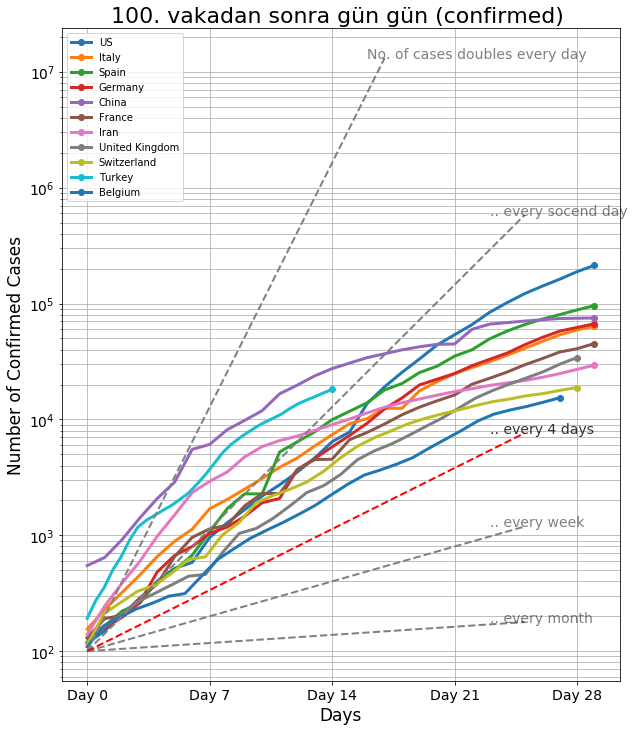

In [15]:
temp = df_confirmed.groupby('country').sum().drop(["Lat","Long"],axis =1).sort_values(df_confirmed.columns[-1], ascending= False)

threshold = 100
f = plt.figure(figsize=(10,12))
ax = f.add_subplot(111)
for i,country in enumerate(temp.index):
    if i > 10:
        break
    x = 30
    t = temp.loc[temp.index== country].values[0]
    t = t[t>threshold][:x]
     
    date = np.arange(0,len(t[:x]))
    xnew = np.linspace(date.min(), date.max(), 30)
    spl = make_interp_spline(date, t, k=1)  # type: BSpline
    power_smooth = spl(xnew)
    plt.plot(xnew,power_smooth,'-o',label = country,linewidth =3, markevery=[-1],)

plt.tick_params(labelsize = 14)        
plt.xticks(np.arange(0,30,7),[ "Day "+str(i) for i in range(30)][::7])     

# Reference lines 
x = np.arange(0,18)
y = 2**(x+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate("No. of cases doubles every day",(x[-2],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/2+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every socend day",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/7+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every week",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/30+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every month",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/4+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "Red")
plt.annotate(".. every 4 days",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.8)

plt.xlabel("Days",fontsize=17)
plt.ylabel("Number of Confirmed Cases",fontsize=17)
plt.title("100. vakadan sonra gün gün (confirmed) ",fontsize=22)
plt.legend(loc = "upper left")
plt.yscale("log")
plt.grid(which="both")
plt.show()